
**Proyek: Analisis Data Gaji (Parametrik vs. Non-Parametrik)**

**Tujuan: Menganalisis dataset publik (misalnya, Survei Developer Stack Overflow seperti yang dirujuk dalam slide, atau dataset gaji lainnya) untuk membandingkan gaji (variabel numerik) berdasarkan kelompok yang berbeda (variabel kategori). Anda akan mempraktikkan pemeriksaan asumsi dan memutuskan antara tes parametrik dan non-parametrik**


----

**Load Dataset**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

salary_df = pd.read_csv('synthetic_salary_dataset.csv')

salary_df.head()

,salary,coding_age_group,job_satisfaction
0,121157.0,Adult,Satisfied
1,90454.0,Child,Very Satisfied
2,125879.0,Child,Very Satisfied
3,54012.0,Adult,Satisfied
4,57768.0,Adult,Dissatisfied


---

**2. Pilih Variabel**


**a. Variabel Numerik**
- **Gaji** → `salary`

**b. Variabel Kategori (2 Grup)**
- Pilih variabel dengan **dua kategori:**
  - `coding_age_group` → dibagi menjadi *child* dan *adult* 

**c. Variabel Kategori (>2 Grup)**
- Pilih variabel dengan **3–5 kategori**:
  - `job_satisfaction` → *Tingkat Kepuasan Kerja*

---

**3. Bersihkan Data**
- Hapus nilai yang hilang (`NaN`) dari variabel yang dipilih. 


In [2]:
print(salary_df.info())
print(salary_df.describe())
print(salary_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary            200 non-null    float64
 1   coding_age_group  200 non-null    object 
 2   job_satisfaction  200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB
None
              salary
count     200.000000
mean    73490.080000
std     42687.064801
min     13229.000000
25%     43318.500000
50%     64091.500000
75%     89815.750000
max    254815.000000
salary              0
coding_age_group    0
job_satisfaction    0
dtype: int64


---

**4. Analisis 2 Grup**  
**Gaji berdasarkan `child` vs `adult`***

**a. Periksa Asumsi**
- **Ukuran Sampel:**  
  Berapa *n* untuk grup `child` dan `adult`? Apakah keduanya ≥ 30?
- **Normalitas:**  
  Buat histogram gaji untuk setiap grup.  
  Apakah distribusinya terlihat normal? (Data gaji sering *right-skewed*.)

Ukuran sampel child: 65
Ukuran sampel adult: 135


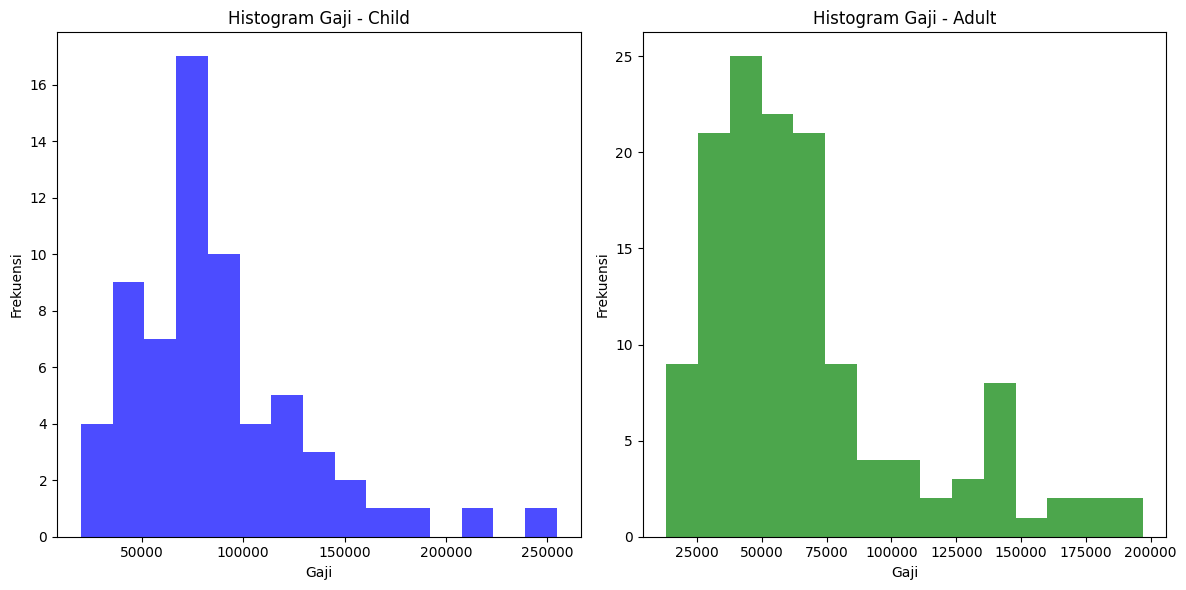

t manual: -4.949747468305833
p-value manual: 0.0000015858
Tolak H0: Ada perbedaan signifikan antara gaji child dan adult.


In [8]:
# cek asumsi apakah ukuran sampel sudah >=30
n_child = len(salary_df[salary_df['coding_age_group'] == 'Child'])
n_adult = len(salary_df[salary_df['coding_age_group'] == 'Adult'])

print("Ukuran sampel child:", n_child)
print("Ukuran sampel adult:", n_adult)


# salary_df.groupby('coding_age_group').size()

# buat histogram untuk setiap grup
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(salary_df[salary_df['coding_age_group'] == 'Child']['salary'], 
         bins=15, 
         color='blue', 
         alpha=0.7)
plt.title('Histogram Gaji - Child')
plt.xlabel('Gaji')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
plt.hist(salary_df[salary_df['coding_age_group'] == 'Adult']['salary'], 
         bins=15, 
         color='green', 
         alpha=0.7)
plt.title('Histogram Gaji - Adult')
plt.xlabel('Gaji')
plt.ylabel('Frekuensi')


plt.tight_layout()
plt.show()



# uji t-test karena ukuran sampel sudah >=30
import numpy as np
xbar_child = np.mean(n_child)
xbar_adult = np.mean(n_adult)

# manual t-statistic (sama seperti yg kamu punya)
numerator = xbar_child - xbar_adult
denominator = np.sqrt(n_child**2 / n_child + n_adult**2 / n_adult)
t_manual = numerator / denominator
print("t manual:", t_manual)


# Derajat kebebasan
import scipy.stats as stats
df = n_child + n_adult - 2
# Hitung p-value dua sisi
p_value = 2 * stats.t.sf(abs(t_manual), df)

# print("p-value manual:", p_value)
print("p-value manual:", format(p_value, ".10f"))


alpha = 0.05
if p_value < alpha:
    print("Tolak H0: Ada perbedaan signifikan antara gaji child dan adult.")
else:
    print("Gagal tolak H0: Tidak ada perbedaan signifikan antara gaji child dan adult.")



---

### b. Lakukan Tes
- **Parametrik:**  
  Lakukan *unpaired t-test* (jika asumsi terpenuhi).
- **Non-Parametrik:**  
  Lakukan *Wilcoxon–Mann–Whitney test* (`pingouin.mwu`) — lihat slide 26.

---

## 5. Analisis >2 Grup  
**Contoh:** Gaji berdasarkan `job_sat`

### a. Periksa Asumsi
- **Ukuran Sampel:**  
  Berapa *n* untuk setiap kategori kepuasan kerja? Apakah semuanya ≥ 30?
- **Normalitas:**  
  Buat histogram gaji untuk setiap grup.

### b. Lakukan Tes
- **Parametrik:**  
  Lakukan *ANOVA* (jika asumsi terpenuhi).
- **Non-Parametrik:**  
  Lakukan *Kruskal–Wallis test* (`pingouin.kruskal`) — lihat slide 27.

---

## 6. Tulis Kesimpulan
- Laporkan temuan Anda:
  - Apakah ada **perbedaan signifikan** dalam gaji antar kelompok?
- Bandingkan **nilai-p** dari tes parametrik dan non-parametrik:
  - Apakah kesimpulan Anda (*tolak atau gagal tolak H₀*) sama?
- Diskusikan:
  - Tes mana yang paling tepat untuk data Anda,  
    dan **mengapa**, berdasarkan hasil pemeriksaan asumsi.

---
